# PREVISÕES DE LUCROS

Você tem uma máquina de sorvete e deseja criar um modelo para prever as vendas diárias baseado na temperatura 
Vamos construir uma rede neural simples para resolver este problema  
Base de dados:
Input (X): Temperatura externa
Output (Y): Vendas diárias em dólares
    
<img width=350 heigth=350 src=img/ice-cream-4182993_1280.jpg>

<img width=600 heigth=600 src=img/previsoes_sorvete.png>

<img width=600 heigth=600 src=img/previsoes_sorvete_grafico.png>

- Base de dados:
  - Input (X): Temperatura
  - Output (Y): Lucro diário em dólares 

# Etapa 1: Importação das bibliotecas

In [1]:
# descomentar para ambiente colab
#%tensorflow_version 2.x

import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
tf.__version__

C:\Users\ricar\AppData\Roaming\Python\Python37\site-packages\requests\__init__.py:91: RequestsDependencyWarning: urllib3 (1.25.9) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)
C:\Users\ricar\AppData\Roaming\Python\Python37\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\ricar\AppData\Roaming\Python\Python37\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\ricar\AppData\Roaming\Python\Python37\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:543: FutureWarning: Passing (type, 1

'2.3.0'

# Etapa 2: Importação da base de dados

In [2]:
sales_df = pd.read_csv('SalesData.csv')

In [3]:
sales_df

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194
...,...,...
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304


In [4]:
sales_df.head(5)

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


In [5]:
sales_df.tail(10)

,Temperature,Revenue
490,23.824922,584.399945
491,34.472169,809.352520
492,23.056214,552.819351
493,14.931506,377.430928
494,25.112066,571.434257
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304
499,28.957736,655.660388


In [9]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [10]:
sales_df.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


# Etapa 3: Visualização da base de dados

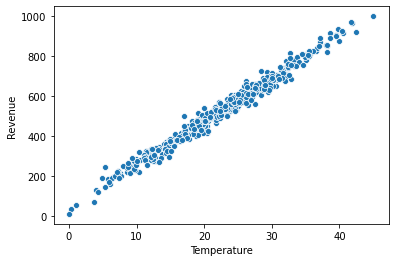

In [11]:
sns.scatterplot(sales_df['Temperature'], sales_df['Revenue']);

# Etapa 4: Criação das variáveis da base de dados

In [12]:
X_train = sales_df['Temperature']
y_train = sales_df['Revenue']

In [13]:
X_train.shape

(500,)

In [14]:
y_train.shape

(500,)

# Etapa 5: Criação e construção do modelo

In [15]:
model = tf.keras.Sequential()


#primeiro vamos testar com 1 saída que é units e 1 atributo de entrada que é input_shape
#model.add(tf.keras.layers.Dense(units = 1, input_shape = [1]))

#depois vamos executar com 10 neurônios na camada oculta e 1 neurônio na camada de entrada
# se houvesse mais dados de entrada iria aumentar input_shape
model.add(tf.keras.layers.Dense(units = 10, input_shape = [1]))
#depois vamos adicionar um neurônio na camada de saída saída
model.add(tf.keras.layers.Dense(units = 1))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                20        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.1), loss = 'mean_squared_error')

In [18]:
epochs_hist = model.fit(X_train, y_train, epochs = 1000)

Epoch 1/1000
16/16 [==============================] - 0s 563us/step - loss: 131087.9375
Epoch 2/1000
16/16 [==============================] - 0s 500us/step - loss: 14011.7520
Epoch 3/1000
16/16 [==============================] - 0s 557us/step - loss: 3347.8577
Epoch 4/1000
16/16 [==============================] - 0s 562us/step - loss: 1350.3199
Epoch 5/1000
16/16 [==============================] - 0s 500us/step - loss: 802.1956
Epoch 6/1000
16/16 [==============================] - 0s 552us/step - loss: 716.2961
Epoch 7/1000
16/16 [==============================] - 0s 625us/step - loss: 686.8322
Epoch 8/1000
16/16 [==============================] - 0s 563us/step - loss: 685.1266
Epoch 9/1000
16/16 [==============================] - 0s 563us/step - loss: 681.5560
Epoch 10/1000
16/16 [==============================] - 0s 625us/step - loss: 677.6595
Epoch 11/1000
16/16 [==============================] - 0s 625us/step - loss: 672.6516
Epoch 12/1000
16/16 [==============================] - 0

16/16 [==============================] - 0s 625us/step - loss: 664.7154
Epoch 97/1000
16/16 [==============================] - 0s 500us/step - loss: 629.8676
Epoch 98/1000
16/16 [==============================] - 0s 688us/step - loss: 641.1110
Epoch 99/1000
16/16 [==============================] - 0s 684us/step - loss: 703.9944
Epoch 100/1000
16/16 [==============================] - 0s 562us/step - loss: 636.4113
Epoch 101/1000
16/16 [==============================] - 0s 562us/step - loss: 662.4040
Epoch 102/1000
16/16 [==============================] - 0s 689us/step - loss: 673.1213
Epoch 103/1000
16/16 [==============================] - 0s 625us/step - loss: 686.6429
Epoch 104/1000
16/16 [==============================] - 0s 563us/step - loss: 699.2841
Epoch 105/1000
16/16 [==============================] - 0s 562us/step - loss: 668.3231
Epoch 106/1000
16/16 [==============================] - 0s 623us/step - loss: 636.4285
Epoch 107/1000
16/16 [==============================] - 0s 56

16/16 [==============================] - 0s 687us/step - loss: 646.3187
Epoch 191/1000
16/16 [==============================] - 0s 561us/step - loss: 645.4617
Epoch 192/1000
16/16 [==============================] - 0s 500us/step - loss: 783.5047
Epoch 193/1000
16/16 [==============================] - 0s 750us/step - loss: 768.5372
Epoch 194/1000
16/16 [==============================] - 0s 750us/step - loss: 646.8616
Epoch 195/1000
16/16 [==============================] - 0s 687us/step - loss: 692.9996
Epoch 196/1000
16/16 [==============================] - 0s 626us/step - loss: 668.3103
Epoch 197/1000
16/16 [==============================] - 0s 688us/step - loss: 666.2522
Epoch 198/1000
16/16 [==============================] - 0s 875us/step - loss: 761.0459
Epoch 199/1000
16/16 [==============================] - 0s 747us/step - loss: 631.4824
Epoch 200/1000
16/16 [==============================] - 0s 622us/step - loss: 638.7250
Epoch 201/1000
16/16 [==============================] - 0s

16/16 [==============================] - 0s 562us/step - loss: 670.9744
Epoch 285/1000
16/16 [==============================] - 0s 564us/step - loss: 729.8049
Epoch 286/1000
16/16 [==============================] - 0s 500us/step - loss: 662.7390
Epoch 287/1000
16/16 [==============================] - 0s 562us/step - loss: 705.3858
Epoch 288/1000
16/16 [==============================] - 0s 625us/step - loss: 706.7926
Epoch 289/1000
16/16 [==============================] - 0s 500us/step - loss: 680.2491
Epoch 290/1000
16/16 [==============================] - 0s 500us/step - loss: 628.5145
Epoch 291/1000
16/16 [==============================] - 0s 563us/step - loss: 655.0817
Epoch 292/1000
16/16 [==============================] - 0s 500us/step - loss: 642.1251
Epoch 293/1000
16/16 [==============================] - 0s 562us/step - loss: 631.3298
Epoch 294/1000
16/16 [==============================] - 0s 688us/step - loss: 775.0685
Epoch 295/1000
16/16 [==============================] - 0s

16/16 [==============================] - 0s 500us/step - loss: 769.6063
Epoch 379/1000
16/16 [==============================] - 0s 563us/step - loss: 771.0636
Epoch 380/1000
16/16 [==============================] - 0s 500us/step - loss: 786.8054
Epoch 381/1000
16/16 [==============================] - 0s 563us/step - loss: 668.4220
Epoch 382/1000
16/16 [==============================] - 0s 563us/step - loss: 689.7236
Epoch 383/1000
16/16 [==============================] - 0s 562us/step - loss: 640.3541
Epoch 384/1000
16/16 [==============================] - 0s 625us/step - loss: 646.8798
Epoch 385/1000
16/16 [==============================] - 0s 625us/step - loss: 632.7713
Epoch 386/1000
16/16 [==============================] - 0s 625us/step - loss: 641.8781
Epoch 387/1000
16/16 [==============================] - 0s 750us/step - loss: 686.5186
Epoch 388/1000
16/16 [==============================] - 0s 688us/step - loss: 672.4177
Epoch 389/1000
16/16 [==============================] - 0s

16/16 [==============================] - 0s 603us/step - loss: 681.3129
Epoch 473/1000
16/16 [==============================] - 0s 625us/step - loss: 660.1560
Epoch 474/1000
16/16 [==============================] - 0s 500us/step - loss: 667.7986
Epoch 475/1000
16/16 [==============================] - 0s 562us/step - loss: 729.9595
Epoch 476/1000
16/16 [==============================] - 0s 516us/step - loss: 680.8051
Epoch 477/1000
16/16 [==============================] - 0s 500us/step - loss: 704.4763
Epoch 478/1000
16/16 [==============================] - 0s 625us/step - loss: 662.7427
Epoch 479/1000
16/16 [==============================] - 0s 498us/step - loss: 642.8687
Epoch 480/1000
16/16 [==============================] - 0s 565us/step - loss: 662.7846
Epoch 481/1000
16/16 [==============================] - 0s 625us/step - loss: 744.1200
Epoch 482/1000
16/16 [==============================] - 0s 561us/step - loss: 640.6511
Epoch 483/1000
16/16 [==============================] - 0s

16/16 [==============================] - 0s 563us/step - loss: 649.0782
Epoch 567/1000
16/16 [==============================] - 0s 563us/step - loss: 664.4295
Epoch 568/1000
16/16 [==============================] - 0s 623us/step - loss: 752.8159
Epoch 569/1000
16/16 [==============================] - 0s 561us/step - loss: 662.4739
Epoch 570/1000
16/16 [==============================] - 0s 500us/step - loss: 643.3346
Epoch 571/1000
16/16 [==============================] - 0s 500us/step - loss: 661.3047
Epoch 572/1000
16/16 [==============================] - 0s 563us/step - loss: 665.6805
Epoch 573/1000
16/16 [==============================] - 0s 562us/step - loss: 689.8731
Epoch 574/1000
16/16 [==============================] - 0s 563us/step - loss: 640.4395
Epoch 575/1000
16/16 [==============================] - 0s 498us/step - loss: 651.5689
Epoch 576/1000
16/16 [==============================] - ETA: 0s - loss: 1039.88 - 0s 500us/step - loss: 712.7759
Epoch 577/1000
16/16 [==========

16/16 [==============================] - 0s 500us/step - loss: 640.5051
Epoch 660/1000
16/16 [==============================] - 0s 500us/step - loss: 682.6978
Epoch 661/1000
16/16 [==============================] - 0s 563us/step - loss: 644.6484
Epoch 662/1000
16/16 [==============================] - 0s 563us/step - loss: 731.2703
Epoch 663/1000
16/16 [==============================] - 0s 500us/step - loss: 667.2263
Epoch 664/1000
16/16 [==============================] - 0s 562us/step - loss: 700.7266
Epoch 665/1000
16/16 [==============================] - 0s 500us/step - loss: 794.8373
Epoch 666/1000
16/16 [==============================] - 0s 627us/step - loss: 697.0120
Epoch 667/1000
16/16 [==============================] - 0s 502us/step - loss: 641.2137
Epoch 668/1000
16/16 [==============================] - 0s 440us/step - loss: 689.9064
Epoch 669/1000
16/16 [==============================] - 0s 563us/step - loss: 664.8384
Epoch 670/1000
16/16 [==============================] - 0s

16/16 [==============================] - 0s 502us/step - loss: 664.5025
Epoch 753/1000
16/16 [==============================] - 0s 500us/step - loss: 784.3415
Epoch 754/1000
16/16 [==============================] - 0s 500us/step - loss: 722.2270
Epoch 755/1000
16/16 [==============================] - 0s 563us/step - loss: 695.9166
Epoch 756/1000
16/16 [==============================] - 0s 500us/step - loss: 662.2277
Epoch 757/1000
16/16 [==============================] - 0s 563us/step - loss: 751.8517
Epoch 758/1000
16/16 [==============================] - 0s 625us/step - loss: 692.1537
Epoch 759/1000
16/16 [==============================] - 0s 625us/step - loss: 693.3235
Epoch 760/1000
16/16 [==============================] - 0s 625us/step - loss: 657.9363
Epoch 761/1000
16/16 [==============================] - 0s 563us/step - loss: 663.3812
Epoch 762/1000
16/16 [==============================] - 0s 500us/step - loss: 634.8772
Epoch 763/1000
16/16 [==============================] - 0s

16/16 [==============================] - 0s 500us/step - loss: 687.4274
Epoch 847/1000
16/16 [==============================] - 0s 688us/step - loss: 634.4493
Epoch 848/1000
16/16 [==============================] - 0s 563us/step - loss: 629.6727
Epoch 849/1000
16/16 [==============================] - 0s 438us/step - loss: 664.9380
Epoch 850/1000
16/16 [==============================] - 0s 563us/step - loss: 630.7617
Epoch 851/1000
16/16 [==============================] - 0s 563us/step - loss: 630.4595
Epoch 852/1000
16/16 [==============================] - 0s 630us/step - loss: 637.2054
Epoch 853/1000
16/16 [==============================] - 0s 627us/step - loss: 679.3735
Epoch 854/1000
16/16 [==============================] - 0s 561us/step - loss: 656.5645
Epoch 855/1000
16/16 [==============================] - 0s 625us/step - loss: 702.4805
Epoch 856/1000
16/16 [==============================] - 0s 562us/step - loss: 661.0128
Epoch 857/1000
16/16 [==============================] - 0s

16/16 [==============================] - 0s 622us/step - loss: 666.7231
Epoch 941/1000
16/16 [==============================] - 0s 498us/step - loss: 650.2164
Epoch 942/1000
16/16 [==============================] - 0s 564us/step - loss: 662.8704
Epoch 943/1000
16/16 [==============================] - 0s 561us/step - loss: 657.1506
Epoch 944/1000
16/16 [==============================] - 0s 625us/step - loss: 648.3753
Epoch 945/1000
16/16 [==============================] - 0s 563us/step - loss: 638.3046
Epoch 946/1000
16/16 [==============================] - 0s 562us/step - loss: 644.3478
Epoch 947/1000
16/16 [==============================] - 0s 565us/step - loss: 672.2014
Epoch 948/1000
16/16 [==============================] - 0s 564us/step - loss: 701.6180
Epoch 949/1000
16/16 [==============================] - 0s 557us/step - loss: 766.5148
Epoch 950/1000
16/16 [==============================] - 0s 437us/step - loss: 731.4819
Epoch 951/1000
16/16 [==============================] - 0s

# Etapa 6: Avaliação do modelo 

In [19]:
epochs_hist.history.keys()

dict_keys(['loss'])

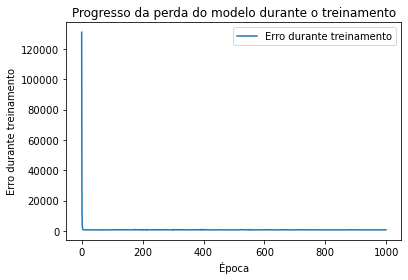

In [20]:
plt.plot(epochs_hist.history['loss'])
plt.title('Progresso da perda do modelo durante o treinamento')
plt.xlabel('Época')
plt.ylabel('Erro durante treinamento')
plt.legend(['Erro durante treinamento']);

In [21]:
model.get_weights()

[array([[-4.5981107e+00,  7.9541035e-02,  2.7492182e-02, -2.6933361e-02,
          3.7428898e-01,  7.5012846e-03,  6.6052131e-02, -1.5694164e-02,
          1.1613609e-02, -2.6521513e-03]], dtype=float32),
 array([-6.81299   , -1.8903654 , -0.6413409 ,  1.2653257 ,  2.8723476 ,
        -0.25746182, -0.1021268 ,  0.50710344, -0.39426798,  0.06697435],
       dtype=float32),
 array([[-4.6788344e+00],
        [ 3.6518627e-03],
        [ 2.1432957e-04],
        [ 2.5227875e-02],
        [ 4.7861212e-01],
        [-5.4014148e-03],
        [ 5.2161437e-02],
        [-3.3305367e-03],
        [ 4.7197472e-03],
        [ 8.7183889e-04]], dtype=float32),
 array([11.7131195], dtype=float32)]

In [22]:
# Previsões com o modelo treinado
temp = 5
receita = model.predict([temp])
print('Previsões de receita usando RNA treinado =', receita)

Previsões de receita usando RNA treinado = [[153.46248]]


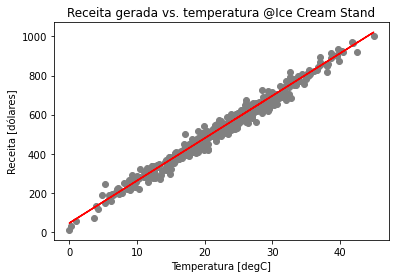

In [23]:
plt.scatter(X_train, y_train, color = 'gray')
plt.plot(X_train, model.predict(X_train), color = 'red')
plt.ylabel('Receita [dólares]')
plt.xlabel('Temperatura [degC]')
plt.title('Receita gerada vs. temperatura @Ice Cream Stand');

# Etapa 7: Confirmar os resultados usando sklearn

In [24]:
X_train.shape

(500,)

In [25]:
X_train = X_train.values.reshape(-1,1)

In [26]:
X_train.shape

(500, 1)

In [27]:
y_train = y_train.values.reshape(-1,1)

In [29]:
y_train.shape

(500, 1)

In [30]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [31]:
regressor.coef_

array([[21.44362551]])

In [32]:
regressor.intercept_

array([44.83126709])

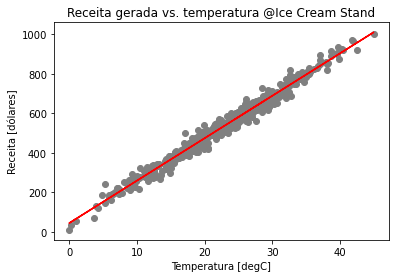

In [33]:
plt.scatter(X_train, y_train, color = 'gray')
plt.plot(X_train, regressor.predict(X_train), color = 'red')
plt.ylabel('Receita [dólares]')
plt.xlabel('Temperatura [degC]')
plt.title('Receita gerada vs. temperatura @Ice Cream Stand');

In [36]:
temp = 5
receita = regressor.predict([[temp]])
print('Previsões de receita usando regressão linear treinada com sklearn =', receita)

Previsões de receita usando regressão linear treinada com sklearn = [[152.04939464]]
